# Idéer til R&D endogen vækst modeller med et dynamisk element 

In [2]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import sympy as sm
sm.init_printing(use_unicode=True)

In [3]:
def plot(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,y)

# mikro problemet 
Optimal arbejdsfordeling

I hver periode, t, skal den enkelte repræsentative forbruger vælge hvor meget han vil arbejde med produktion og arbejde med forskning. Produktion bruges til forbrug i periode t og kapitalopsparing som bidrag til fremtidig produktion. Forskning øger produktiviten i fremtidige perioder .

In [3]:
#valgmuligheder:
# andelen af mulig arbejdstid som bruges på forskning:
sr = sm.symbols('s_Rt')
# I starten antages kapitalopspsparingsraten at være konstant
sk = sm.symbols('s_Kt')

In [4]:
# Ud fra de valg nogle udfald
# Først defineres variable
l = sm.symbols('L_{t}')
ly = sm.symbols('L_{Yt}')
la = sm.symbols('L_{At}')
alpha = sm.symbols('alpha')
k =sm.symbols('K_{t}')
k1 = sm.symbols('K_{t+1}')
y = sm.symbols('Y_{t}')
c = sm.symbols('C')
ct = sm.symbols('C_{t}')
a = sm.symbols('A_{t}')
a1 = sm.symbols('A_{t+1}')
r = sm.symbols('r')

#Greek:
rho = sm.symbols('rho')
beta = sm.symbols('beta')
alpha = sm.symbols('alpha')
phi = sm.symbols('phi')
delta = sm.symbols('delta')
theta = sm.symbols('theta')

t = sm.symbols('t')

# Functions:
uc = sm.Function('u')(ct) 
u = sm.Function('U')(c)

Nyttefunktion:

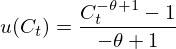

In [5]:
sm.Eq(uc,(ct**(1-theta)-1)/(1-theta))

In [6]:
hello = sm.Limit((ct**(1-theta)-1)/(1-theta),theta,1)

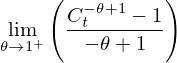

In [7]:
hello

In [8]:
hello.doit()

In [9]:
sm.diff(ct**(1-rho),rho)

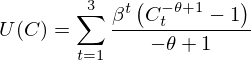

In [10]:
sm.Eq(u,sm.Sum(beta**t*(ct**(1-theta)-1)/(1-theta),(t,1,3)))

*** Value of capital leftover capital ***

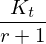

In [11]:
k/(1+r)

In [12]:
sm.Eq(y,a*k**alpha*(l*(1-sr))**(1-alpha))

In [13]:
mpl = sm.Derivative(a*k**alpha*(l*(1-sr))**(1-alpha),k)

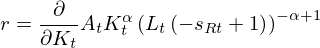

In [14]:
sm.Eq(r,mpl)

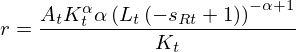

In [15]:
sm.Eq(r,mpl.doit())

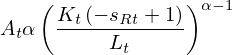

In [16]:
a*alpha*((k/l*(1-sr))**(alpha-1))

Betingelser i produktion:

In [17]:
sm.Eq(c,sk*y)

Tidshorisonts betingelser

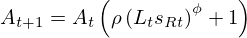

In [18]:
sm.Eq(a1,a*(1+rho*(l*sr)**phi))

In [19]:
sm.Eq(k1,sk*y+(1-delta)*k)

In [4]:
sm.init_printing(use_unicode=False)

In [6]:
def utility(c,theta):
    ''' Utility function for consumption including the limit case for rho->1 '''
    if c<0:
        raise error
    if rho == 1:
        return np.log(c)
    else:
        return (c**(1-theta)-1)/(1-theta)

def total_utility(c, beta, theta, k):
    '''
    Sums utility for c for multiple years
    c is an array 
    '''
    t_u = 0
    for i,ct in enumerate(c):
        t_u += beta**i*utility(ct,theta)
    t_u += beta**(len(c))*utility(ct,theta)
    return t_u

def prod(k,l,alpha,b):
    return b*k**alpha*l**(1-alpha)

In [8]:
def tot_ut_sk(sk,t, k0, b, beta, alpha, theta, delta, detail=False):
    '''
    Returns utitlity for  given period 
    depending on initial amount of kapital, k0,
    and a fixed savingsrate, sk, for all periods 
    '''
    k_short = np.empty(t)
    c_short = np.empty(t)
    y_short = np.empty(t)
    k_short[0] = k0
    for i in range(t):
        y_short[i] = prod(k_short[i],l,alpha,b)
        c_short[i]=(1-sk)*y_short[i]
        if i+1<t:
            k_short[i+1]=sk*y_short[i]+(1-delta)*k_short[i] 
    if detail:
        return k_short,c_short,y_short
    else:
        return total_utility(c_short,beta,theta,k_short[-1])

def opt_sk(t, b, beta, delta, alpha, theta, k0):
    '''Finds optimal fixed savings rate, sk, 
    for maximal total utility '''
    obj = lambda sk: -tot_ut_sk(sk,t,k0, b, beta, alpha, theta, delta)
    res = optimize.minimize_scalar(obj, alpha, method='bounded',bounds=[0,1])
    return res.x

In [22]:
theta = 0.5
alpha = 1/3
delta = 0.05

In [23]:
t = 1000
b = 10
k0 = 10
l = 1
beta = 0.9

In [24]:
obj = lambda sk: -tot_ut_sk(sk,t, k0, b, beta,alpha, theta, delta)
sk0 = [0.3]
res = optimize.minimize(obj, sk0, method='Nelder-Mead')
print(f'Optimal sk = {res.x[0]:.4f}, with total utility = {-res.fun:.4f}')

Optimal sk = 0.2419, with total utility = 84.1670


In [25]:
obj = lambda sk: -tot_ut_sk(sk,t, k0, b, beta,alpha, theta, delta)
sk0 = [0.3]
res = optimize.minimize_scalar(obj, sk0, method='bounded',bounds=[0,1])
print(f'Optimal sk = {res.x:.4f}, with total utility = {-res.fun:.4f}')

Optimal sk = 0.2420, with total utility = 84.1670


In [26]:
n = 100
ks = np.linspace(0.1,200,n)
sks = np.zeros(n)
for i,k in enumerate(ks):
    sks[i] = opt_sk(t, b, beta,delta,alpha,theta,k)

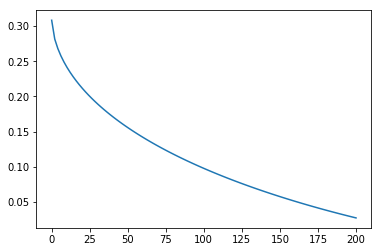

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ks,sks)

# Hvad hvis forskellige opsparingsrater kan vælges hvert år?

In [14]:
def tot_ut_multiple_sks(sks, k0, b, beta, theta, alpha, delta, vector=False):
    '''
    Finds total utitilty for a set of years with a savingsrate for each year
    '''
    t = len(sks)
    k_short = np.empty(t)
    c_short = np.empty(t)
    y_short = np.empty(t)
    k_short[0] = k0
    for i in range(t):
        y_short[i] = prod(k_short[i],l,alpha,b)
        c_short[i]=(1-sks[i])*y_short[i]
        if i+1<t:
            k_short[i+1]=sks[i]*y_short[i]+(1-delta)*k_short[i]
    if vector==False:
        return total_utility(c_short, beta, theta, k_short[-1])
    elif vector==True:
        return total_utility(c_short, beta, theta, k_short[-1]), y_short, c_short, k_short

In [16]:
theta = 0.9
alpha = 1/3
delta = 0.05
beta = 1
b = 100
k0 = 20
l = 1

In [18]:
sks = [0.4, 0.3201, 0.2988, 0.9, 0.]
tot_ut_multiple_sks(sks, k0, b, beta, theta, alpha,delta)

NameError: name 'rho' is not defined

In [19]:
t = 200
obj = lambda sks: -tot_ut_multiple_sks(sks, k0, b, beta, theta, alpha, delta)
sks0 = np.full(t,0.3)
sks0[-1] = 0
bounds = np.full((t,2),[0,1])


res = optimize.minimize(obj, sks0, method='SLSQP', bounds=bounds)

print(f'Optimal sk')
np.set_printoptions(precision=4,suppress=True)
print(res.x)
print('Total utility:')
print(f'{-res.fun:.4f}')

NameError: name 'rho' is not defined

In [32]:
def optimal_sks(t, b, beta, delta, alpha, theta, k0, first=True):
    obj = lambda sks: -tot_ut_multiple_sks(sks, k0, b, beta, theta, alpha, delta)
    sks0 = np.full(t,0.3)
    sks0[-1] = 0
    bounds = np.full((t,2),[0,1])
    res = optimize.minimize(obj, sks0, method='SLSQP', bounds=bounds)
    if res.success == False:
        print('Optimization was sadly not succesfull')
    elif first:
        return res.x[0]
    else:
        return res.x

In [33]:
theta = 0.9
alpha = 1/3
delta = 0.05
beta = 1
b = 2
beta = 0.99
k0 = 40
l = 1
t = 100

In [34]:
opt_sk(t, b, beta, delta, alpha, theta, k0)

In [35]:
sks = optimal_sks(t, b, beta, delta, alpha, theta, k0,first=False)

In [36]:
total, y, c, k = tot_ut_multiple_sks(sks, k0, b, beta, theta, alpha, delta, vector=True)

In [37]:
sks_alt = [alpha for i in list(range(t))]
total_alt, y_alt, c_alt, k_alt = tot_ut_multiple_sks(sks_alt, k0, b, beta, theta, alpha, delta, vector=True)

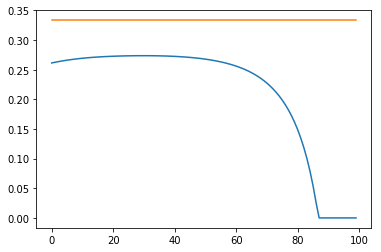

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(list(range(t)),sks)
ax.plot(list(range(t)),sks_alt)

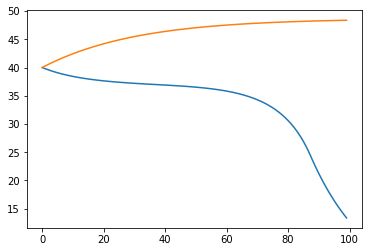

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(list(range(t)),k)
ax.plot(list(range(t)),k_alt)

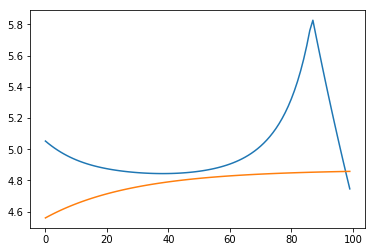

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(list(range(t)),c)
ax.plot(list(range(t)),c_alt)

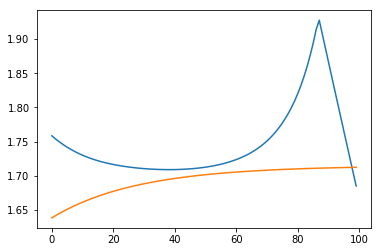

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(list(range(t)), [utility(ct,theta)for ct in c])
ax.plot(list(range(t)), [utility(ct,theta)for ct in c_alt])

In [42]:
ks = np.linspace(0.1,100,100)
sks1 = np.empty(100)

for i, k in enumerate(ks):
    sks1[i] = optimal_sks(t, b, beta, delta, alpha, theta, k)

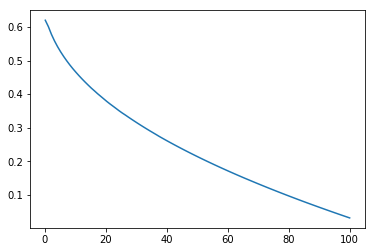

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ks,sks1)

In [44]:
ks = np.linspace(1,600,50)
sks1 = np.empty(50)

for i, k in enumerate(ks):
    sks1[i] = optimal_sks(t, b, beta, delta, alpha, theta, k)

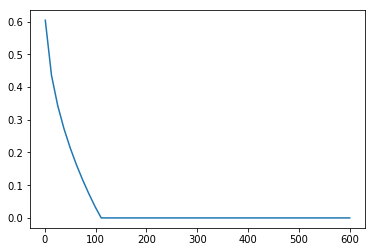

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ks,sks1)

# Need for speed

In [46]:
import time

# Makro sammensætning

In [47]:
sm.init_printing(use_unicode=True)

In [48]:
#valgmuligheder:
# andelen af mulig arbejdstid som bruges på forskning:
sr = sm.symbols('s_Rt')
# I starten antages kapitalopspsparingsraten at være konstant
sk = sm.symbols('s_Kt')

# Ud fra de valg nogle udfald
# Først defineres variable
l = sm.symbols('L_{t}')
alpha = sm.symbols('alpha')
k =sm.symbols('K_{t}')
k1 = sm.symbols('K_{t+1}')
y = sm.symbols('Y_{t}')
c = sm.symbols('C')
ct = sm.symbols('C_{t}')
a = sm.symbols('A_{t}')
a1 = sm.symbols('A_{t+1}')
r = sm.symbols('r')

#Greek:
rho = sm.symbols('rho')
beta = sm.symbols('beta')
alpha = sm.symbols('alpha')
phi = sm.symbols('phi')
delta = sm.symbols('delta')
lambd = sm.symbols('lambda')
theta = sm.symbols('theta')

t = sm.symbols('t')

# Functions:
uc = sm.Function('u')(ct) 
u = sm.Function('U')(c)

In [49]:
sm.Eq(y,a*k**alpha*(l*(1-sr))**(1-alpha))

In [50]:
sm.Eq(k1,sk*y+(1-delta)*k)

In [51]:
sm.Eq(a1,a+rho*a**phi*(l*sr)**lambd)

In [280]:
# parameters:
alpha = 1/3
delta = 0.05
rho = 0.9
phi = 0.1
lambd = 0.1
n=0

# fixed parameters
sr = 0.05
sk = 0.2

# starting values:
l0 = 100
k0 = 1000
a0 = 1000

In [262]:
# What we know
# growth:
gse = (1+n)**(lambd/(1-phi))-1
gse

In [264]:
# ktilde:
(sk/(n+gse+delta+n*gse))**(1/(1-alpha))*(1-sr)

In [266]:
(sk/(n+gse+delta+n*gse))**(alpha/(1-alpha))*(1-sr)

In [282]:
# funktiions
def prod(a,k,l,sr,alpha):
    return k**alpha*(a*(1-sr)*l)**(1-alpha)
def capitalakku(a,k,l,sr,sk,alpha,delta):
    return prod(a,k,l,sr,alpha)*sk+(1-delta)*k
def research(a,sr,l,rho,phi):
    return a+rho*a**phi*(l*sr)**lambd

In [326]:
def solowwalk(k0,a0, l0, n, sr, sk, alpha, delta, rho, phi, t):
    k_path=np.array([k0])
    a_path=np.array([a0])
    l_path = [(1+n)**i for i in list(range(end))]
    
    for i in range(1,t):
        k_plus = capitalakku(a_path[i-1],k_path[i-1],l_path[i-1],sr,sk,alpha,delta)
        a_plus = research(a_path[i-1],sr,l_path[i-1],rho,phi)
        
        np.append(k_path, k_plus)
        np.append(a_path, a_plus)
    k_tilde_path = k_path/(a_path*l_path)    
    return a_path, k_path, k_tilde_path

In [298]:
t=10000

In [316]:
hey = np.array([a0])

In [324]:
hey = np.append(hey,10)

In [325]:
hey

array([1000,   10])

In [329]:
list(range(1,t))

In [327]:
a_path, k_path, k_tilde_path = solowwalk(k0,a0, l, n, sr, sk, alpha, delta, rho, phi, t)

IndexError: index 1 is out of bounds for axis 0 with size 1

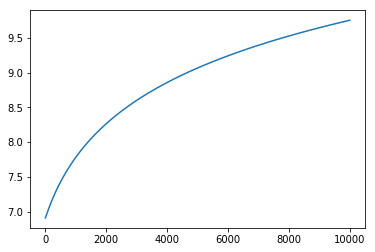

In [292]:
plot(range(t),np.log(a_path))

In [188]:
end = 10000
ks = np.empty(end)
ys = np.empty(end)
ls = [(1+n)**i for i in list(range(end))]
ks[0] = k0
ats = np.zeros(end)
ats[0] = a0
margin = 1e-3
ys[0] = prod(ats[0],ks[0],ls[0],sr,alpha)
ks[1]   = capitalakku(ats[0],ks[0],ls[0],sr,sk,alpha,delta)
ats[1] = research(ats[0],sr,ls[0],rho,phi)

In [171]:

t = 1
while True:
    ys[t] = prod(ats[t],ks[t],ls[t],sr,alpha)
    if -margin<ys[t]-ys[t-1]<margin:
        k_tilde = ks[t]/(ats[t]*ls[t])
        y_tilde = ys[t]/(ats[t]*ls[t])
        print(f'Succesful convergens')
        print(f'Periode = {t}')
        print(f'y_tilde = {y_tilde:.4f}')
        print(f'k_tilde = {k_tilde:.4f}')
        break
    ks[t+1]   = capitalakku(ats[t],ks[t],ls[t],sr,sk,alpha,delta)
    ats[t+1] = research(ats[t],sr,ls[t],rho,phi)
    t += 1 
    if t+1 == end:
        print('no convergens')
        print(t)
        break

Succesful convergens
Periode = 25
y_tilde = 2.3068
k_tilde = 13.6010


In [175]:
ks_small = ks/ls

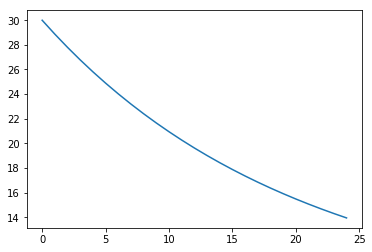

In [176]:
plot(range(t),ks_small[:t])

Simulation

In [138]:
t = 1000
ys = np.zeros(t)
ks = np.zeros(t)
ls = [(1+n)**i for i in list(range(t))]
ks[0] = k0
ats = np.zeros(t)
ats[0] = a0

In [140]:
for i in list(range(t)):
    ys[i] = prod(ats[i],ks[i],ls[i],sr,alpha)
    if i+1<t:
        ks[i+1]   = capitalakku(ats[i],ks[i],ls[i],sr,sk,alpha,delta)
        ats[i+1] = research(ats[i],sr,ls[i],rho,phi)
    

In [141]:
y_small = ys/ls
y_tildes = y_small/ats
log_ys = np.log(ys)
ks_small = ks/ls
ks_tilde = ks_small/ats
log_ats = np.log(ats)
log_ls = np.log(ls)
log_ks = np.log(ks)
log_ks_small = np.log(ks_small)

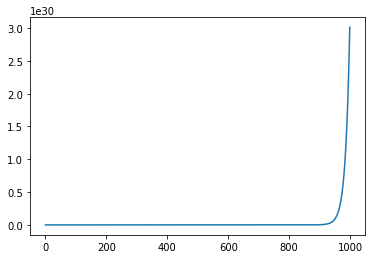

In [124]:
plot(range(t),ks_small)

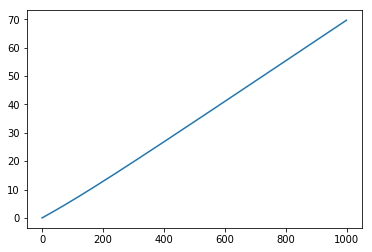

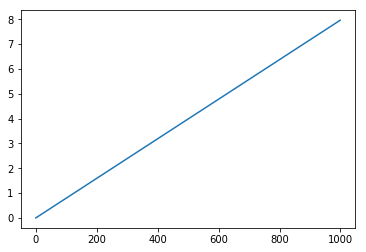

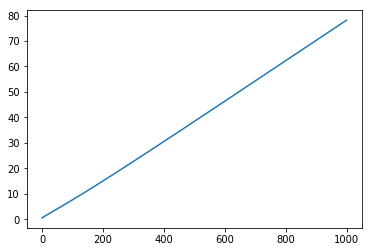

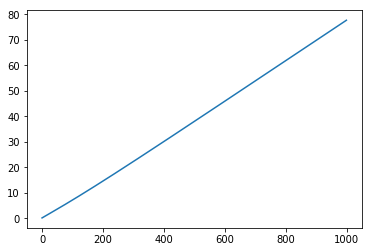

In [64]:
plot(range(t),log_ats)
plot(range(t),log_ls)
plot(range(t),log_ks)
plot(range(t),log_ys)

# Makro med mikro-valg

In [65]:
rho = 0.5
alpha = 1/3
delta = 0.05
beta = 0.5
b = 10
l = 1
t= 50
k0 = 10
l = 1
beta = 0.9

In [66]:
opt_sk(t, b, beta,delta,alpha,rho,k0)

TypeError: prod() missing 1 required positional argument: 'alpha'

In [ ]:
t_store = 25
c = np.empty(t_store)
k = np.empty(t_store)
k[0] = 1
y = np.empty(t_store)
sks = np.empty(t_store)

In [ ]:
for i in range(t_store):
    k0 = k[i]
    sks[i] = opt_sk(t,b, beta,delta,alpha,rho,k0)
    if i+1<t_store:
        k[i+1] = sks[i]*prod(k[i],l,alpha,b)-delta*k[i]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(t_store),sks)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(t_store),k)

In [ ]:
def capakku(k1,l,sk,delta,alpha,b):
    return sk*prod(k1,l,alpha,b)-delta*k1

In [ ]:
t=10
alpha = 1/3
delta = 0.05
sk_fix = 1/3
n= 0.01

In [ ]:
ks = np.empty(t)
ys = np.empty(t)
l = 1
ks[0]= 5.6

In [ ]:
for i in range(t):
    ys[i]=prod(ks[i],l,alpha,b)
    if i+1<t:
        ks[i+1] = capakku(ks[i],l,sk_fix,delta,alpha,b)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(t),ys)